# import package

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve
from tensorflow.keras.losses import categorical_crossentropy


# DataSet

In [3]:
train_data=pd.read_csv("mitbih_train.csv")
train_data.head()
test_data=pd.read_csv("mitbih_test.csv")
test_data.head()


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


split data to features and target

In [4]:
x_train =np.array(pd.read_csv("mitbih_train.csv",header=None,usecols=range(187)))
y_train =np.array(pd.read_csv("mitbih_train.csv",header=None,usecols=[187]).iloc[:,0])
x_test =np.array(pd.read_csv("mitbih_test.csv",header=None,usecols=range(187)))
y_test =np.array(pd.read_csv("mitbih_test.csv",header=None,usecols=[187]).iloc[:,0])
x_train, y_train = shuffle(x_train, y_train, random_state = 101)
x_test, y_test = shuffle(x_test, y_test, random_state = 101)
x_train = np.expand_dims(x_train, 2)
x_test = np.expand_dims(x_test, 2)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(87554, 187, 1)
(21892, 187, 1)
(87554, 5)
(21892, 5)


# CNN model

In [6]:
model = Sequential()

model.add(Conv1D(6, 3, padding='same', activation='relu',input_shape=(187, 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

model.add(Conv1D(filters=16, strides=1, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(5, activation = 'softmax'))
#ann_model = Sequential()
#ann_model.add(Dense(50, activation='relu', input_shape=(187,)))
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(Dense(5, activation='softmax'))

In [7]:
model.compile(optimizer='sgd',loss = 'categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 6)            24        
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 6)            24        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 6)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 90, 16)            496       
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 16)            64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [8]:
trained_model = model.fit(x_train, y_train,batch_size=128, epochs=100,verbose=1, validation_split=0.2)

Epoch 1/100
548/548 [==============================] - 14s 25ms/step - loss: 0.2922 - accuracy: 0.9214 - val_loss: 0.3548 - val_accuracy: 0.9303
Epoch 2/100
548/548 [==============================] - 12s 22ms/step - loss: 0.1710 - accuracy: 0.9548 - val_loss: 0.1794 - val_accuracy: 0.9510
Epoch 3/100
548/548 [==============================] - 10s 18ms/step - loss: 0.1444 - accuracy: 0.9609 - val_loss: 0.1698 - val_accuracy: 0.9532
Epoch 4/100
548/548 [==============================] - 10s 18ms/step - loss: 0.1291 - accuracy: 0.9648 - val_loss: 0.1293 - val_accuracy: 0.9636
Epoch 5/100
548/548 [==============================] - 9s 17ms/step - loss: 0.1176 - accuracy: 0.9667 - val_loss: 0.1198 - val_accuracy: 0.9665
Epoch 6/100
548/548 [==============================] - 10s 18ms/step - loss: 0.1098 - accuracy: 0.9690 - val_loss: 0.2679 - val_accuracy: 0.9142
Epoch 7/100
548/548 [==============================] - 10s 18ms/step - loss: 0.1028 - accuracy: 0.9710 - val_loss: 0.1327 - val_acc

548/548 [==============================] - 9s 17ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.0773 - val_accuracy: 0.9791
Epoch 58/100
548/548 [==============================] - 9s 16ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0728 - val_accuracy: 0.9805
Epoch 59/100
548/548 [==============================] - 9s 17ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0740 - val_accuracy: 0.9802
Epoch 60/100
548/548 [==============================] - 9s 16ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0868 - val_accuracy: 0.9777
Epoch 61/100
548/548 [==============================] - 9s 17ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0733 - val_accuracy: 0.9806
Epoch 62/100
548/548 [==============================] - 9s 17ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.0826 - val_accuracy: 0.9769
Epoch 63/100
548/548 [==============================] - 10s 17ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0985 - val_accuracy: 0.97

In [9]:
score1 = model.evaluate(x_train, y_train, verbose=1)
print("Train score:", score1[0])
print('Train accuracy:', score1[1])
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

2737/2737 [==============================] - 20s 7ms/step - loss: 0.0249 - accuracy: 0.9943
Train score: 0.024858012795448303
Train accuracy: 0.9943121075630188
685/685 [==============================] - 4s 5ms/step - loss: 0.1028 - accuracy: 0.9794
Test score: 0.1027602106332779
Test accuracy: 0.9794445633888245


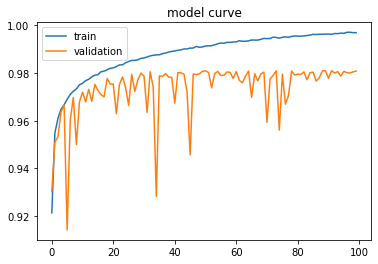

In [10]:

plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model curve')
plt.legend(['train','validation'],loc='upper left')
plt.show()

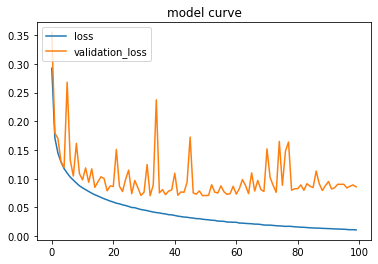

In [12]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model curve')
plt.legend(['loss','validation_loss'],loc='upper left')
plt.show()